# DSCI 100: Final Project Title


By: Arshia, James, Lily, and Raina

### 1.0 Introduction

The Pacific Laboratory for Artificial Intelligence (PLAI), led by Professor Frank Wood from the Department of Computer Science at UBC, developed a Minecraft server built to observe and collect detailed player data. Every action a player performs in the game is systematically recorded, providing insight into how players interact with the Minecraft game, revealing patterns of engagement levels.

By analyzing these patterns, our team aims to understand how different player characteristics influence players' playtime and engagement. This research aims to help refine Minecraft recruitment strategies and ensure that resources including server capacity and software infrastructure are efficiently allocated. By examining player data and meaningful trends and relationships within the dataset, we can help PLAI target recruitment efforts more effectively. 

Our project focuses on two specific predictors of **age** and **experience level** from the players.csv dataset. Age is an important factor as it often correlates with gaming habits, with younger players having higher engagement levels with video games on average. Players with higher experience levels reflect those with improved skills and knowledge that can drive them to have longer hours played. By concentrating on these factors, we aim to create a classification model that distinguishes between players with high and low game engagement (hours played). 

To support the PLAI research group in targeting recruitment efforts more effectively, we aim to identify what kinds of players are most likely to generate large amounts of data through extended gameplay. Specifically: **Can player experience level and age accurately classify players into high vs low engagement groups based on the number of hours that players spend playing Minecraft?**

This strategy will enhance our understanding of player engagement and provide PLAI with insights for targeted recruitment strategies focused only on the players who are most likely to contribute the most data and sustain long term game engagement.

**Summary of players.csv dataset:**


Observation Numbers = 196 Variable Numbers = 7
|Name|Type|Variables Definiton|
|----|----|----|
|Experience|factor|Players experience level|
|Subscribe|logical|Subscription status|
|hashedEmail|character|Encrypted players emails|
|played_hours|numeric| Time played minecraft |
|Name|character|Players name|
|Gender|factor|Players gender|
|Age| numeric|Players age|

# 2.0 Methods and Results

We first started by downloading a few necessary packages for our analysis including tidyverse, tidymodels, and repr. 

In [35]:
library(repr)
library(tidyverse)
library(tidymodels)
set.seed(1)
options(repr.matrix.max.rows = 10)

### 2.1 Load in data

Then we loaded the Minecraft player data from a URL directly into R using `read_csv` and stored it as a variable called players_data to visualize the resulting dataset. 

In [36]:
players_data<-read_csv("https://raw.githubusercontent.com/lilypurdy/toy_ds_project/refs/heads/main/players%20(2).csv")
head(players_data, 5)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21


### 2.2 Wrangle and Clean Data

To wrangle and clean the data, we re-read the data with `read_csv` then used `col_names` to change the column names to more readable titles: experience, subscribed, hashed_email, hours_played, name, and gender. `col_names` is used to specify the expected type of data that is in each column which ensures that each column is interpreted correctly and prevents any mismatched reading issues when the data is read into R. 

In [37]:
clean_players_data <- read_csv("https://raw.githubusercontent.com/Jamesnam1/toy_ds_project/refs/heads/main/players.csv",
    col_names = c("experience", "subscribed", "hashed_email", "hours_played", "name", "gender", "age"),
                col_types = list("c", "l", "c", "d", "c", "c", "i"))
head(clean_players_data)

Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”


experience,subscribed,hashed_email,hours_played,name,gender,age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<int>
experience,NA,hashedEmail,NA,name,gender,NA
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21


Next the `select()` function is used to remove the columns that aren’t needed for our data analysis: hashed_email, subscribed, name, and gender. With the `filter()` function, we filtered out all the rows where age had a missing value, to only use players data with complete age information. Next the `mutate()` function is used to transform the categorical experience variable into a numeric scale using `case_when()` with the mapping: pro = 5, veteran = 4, amateur = 3, regular = 2, beginner = 1. This transformation converts the factor into a numeric variable aligning with the increasing levels of experience. 
Finally, the new variable “level” is created based on hours_played, with players with more than 15 hours of playtime labelled as “high” game engagement and less than 15 “low” engagement. This variable serves as the target for the classification model.  Finally, the wrangled and cleaned dataset was assigned to the name "players" and the first 5 rows were viewed. 

In [49]:
players <- clean_players_data |>
  select(-hashed_email, -subscribed, -name, -gender) |>
  filter(!is.na(age)) |>
  mutate(
    experience = case_when(
      experience == "Pro" ~ 5,
      experience == "Veteran" ~ 4,
      experience == "Amateur" ~ 3,
      experience == "Regular" ~ 2,
      experience == "Beginner" ~ 1,
      TRUE ~ NA_real_
    ), 
   level = case_when(
      hours_played > 40 ~ "high",
      hours_played <= 40 ~ "low"))|>
      arrange(-hours_played)

head(players, 5)

experience,hours_played,age,level
<dbl>,<dbl>,<int>,<chr>
2,223.1,17,high
2,218.1,20,high
2,178.2,19,high
3,150.0,16,high
3,56.1,23,high


In [50]:
players <- select(players, -hours_played)|>
    mutate(level = as_factor(level))
players

experience,age,level
<dbl>,<int>,<fct>
2,17,high
2,20,high
2,19,high
3,16,high
3,23,high
⋮,⋮,⋮
1,17,low
3,17,low
3,20,low


### 2.3 Summarize Data

The next step we did was calculate the mean values of the quantitative variables of interest: played_hours and age. The summary statistics were generated through the `summarise()` function with `na.rm = TRUE` used to ignore any missing values in the data. The resulting "mean_values" were viewed in a tibble, with the mean playing hours being 5.90 hours and mean age being 20.47 years. Summarizing the data set offers insight into general trends of the data, specifically the "average" Minecraft player for our targeting purposes. 

In [47]:
mean_values <- players |> summarise(
    mean_played_hours = mean(hours_played, na.rm = TRUE),
    mean_age = mean(age, na.rm = TRUE))

mean_values

mean_played_hours,mean_age
<dbl>,<dbl>
5.904639,20.52062


Visualizations were then created to visually see the relationship within the data between the explanatory variables (experience and age) and the response variable (played hours). The focus is understanding how player experience and age correlate with the amount of hours spent playing Minecraft for recruitment focus to increase game engagement. 

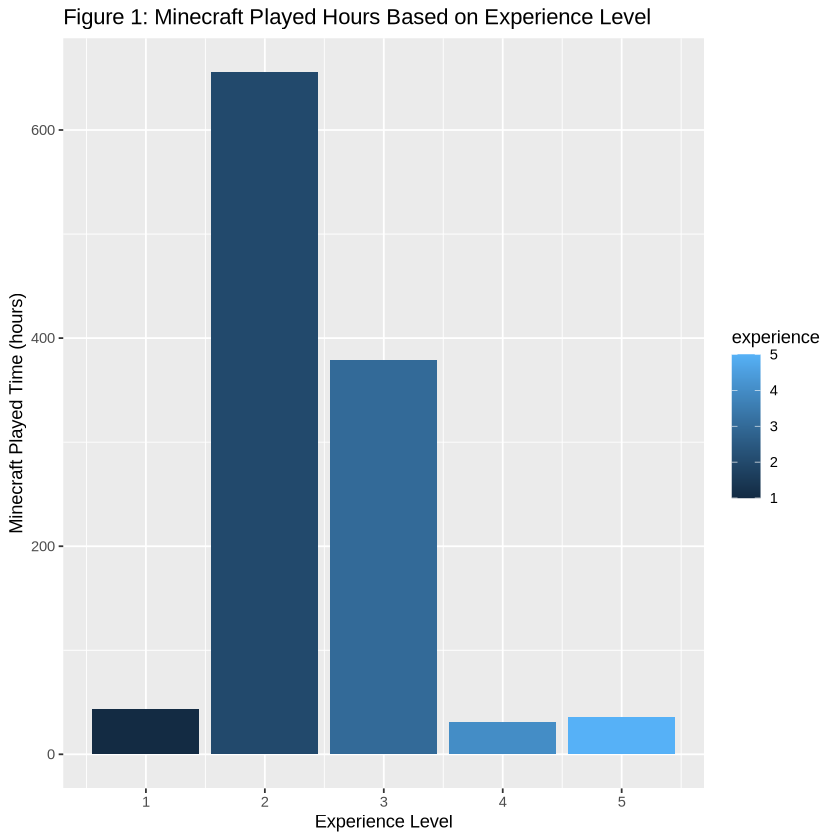

In [44]:
ggplot(players, aes(x = experience, y = hours_played, fill = experience)) +
    geom_bar(stat = "identity") +
    labs(title = "Figure 1: Minecraft Played Hours Based on Experience Level", x = "Experience Level", y = "Minecraft Played Time (hours)")


To compare the Minecraft playtime across the five different experience levels, a bar plot was created with the `ggplot()` and `geom_bar()` functions and the . This graph shows that Regular (3) and Amateur (2) experience level players contribute significantly more playtime hours compared to the other three experience levels of Beginner, Pro, and Veteran. This insight is useful for targeting our recruitment and marketing efforts catered to players' experince levels to boost game interaction. 

Warning message in scale_y_log10(labels = label_comma()):
“log-10 transformation introduced infinite values.”


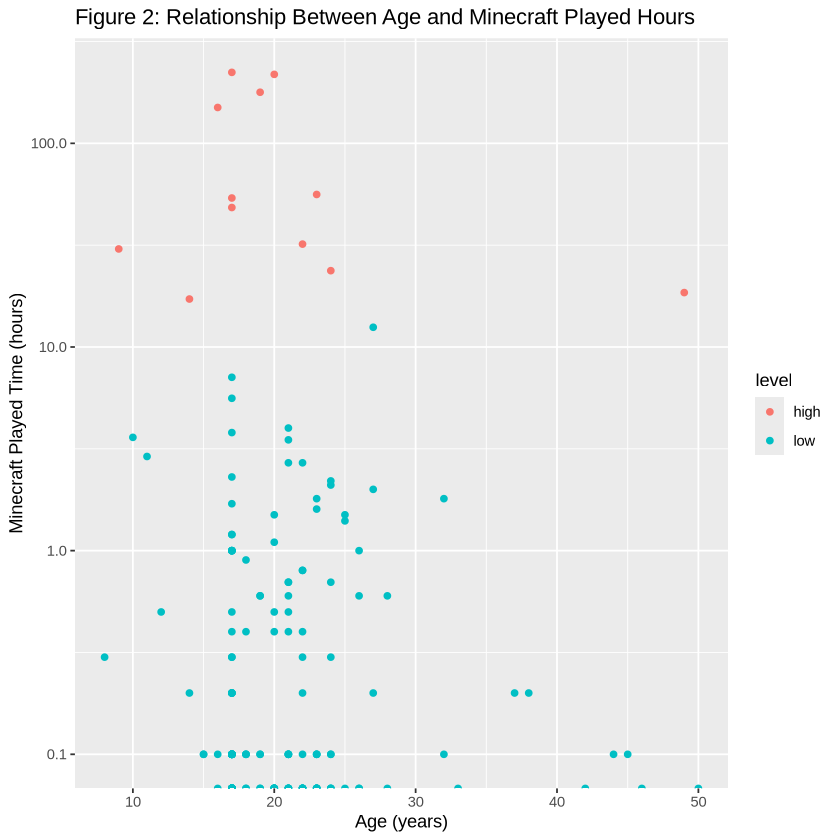

In [30]:
ggplot(players, aes(x = age, y = hours_played, color = level)) +
    geom_point() +
    labs(title = "Figure 2: Relationship Between Age and Minecraft Played Hours", 
         x = "Age (years)", 
         y = "Minecraft Played Time (hours)") +
        scale_y_log10(labels = label_comma())


The second visualization is a scatter plot exploring the relationship between the age of players and the number of Minecraft hours played, created with the `ggplot()` and `geom_point()` functions to display each individual data point. Data points are also color-coded into two levels: "high" (red) and "low" (blue). The trend suggests that younger players tend to have higher playtime, while older individuals generally play less. Most high playtime values are clustered among teenagers and young adults, while older individuals tend to play less. A few outliers exist where some older individuals have significant playtime, but they are uncommon. To better visualize this relationship without being overshadowed by the presence of a few significant outliers, the y-axis is logarithmically scaled using the function `scale_y_log10()`. The plot reveals most players of all ages tend to play less than ten hours per week, with a few high outliers.

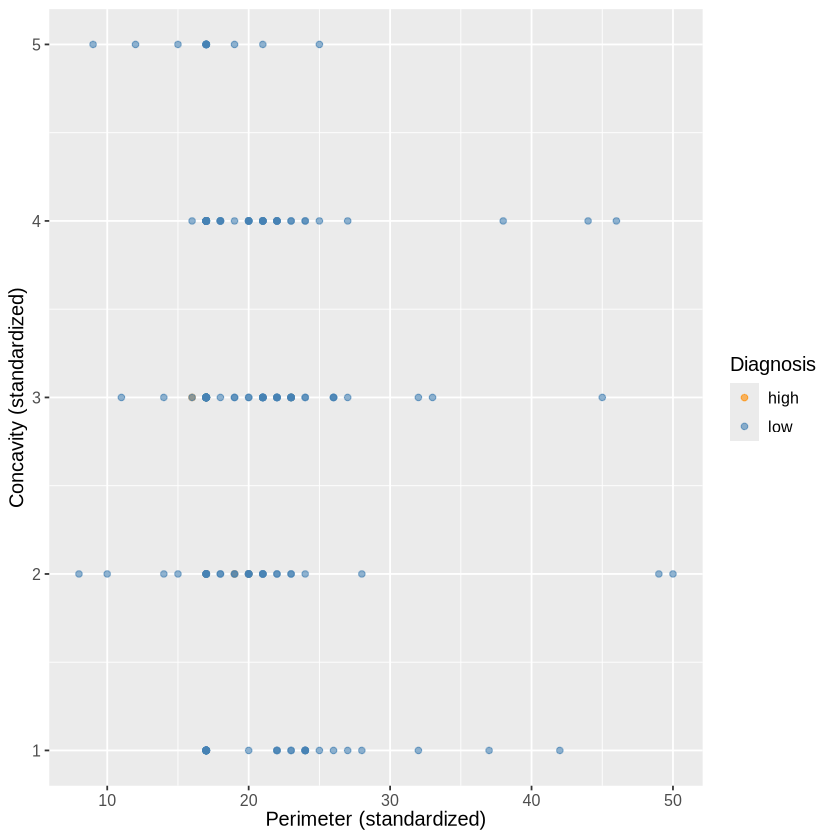

In [51]:
initial_scatter <- players |>
  ggplot(aes(x = age, y = experience, color = level)) +
  geom_point(alpha = 0.6) +
  labs(x = "Perimeter (standardized)",
       y = "Concavity (standardized)",
       color = "Diagnosis") +
  scale_color_manual(values = c("darkorange", "steelblue")) +
  theme(text = element_text(size = 12))
initial_scatter

## 2.5 Splitting Data

In [53]:
#set the training data to 75 percent of the overall percentage
set.seed(1)

split_data <- initial_split(players, prop = 3/4, strata = level)

training_data <- training(split_data)
testing_data <- testing(split_data)

head(training_data)

experience,age,level
<dbl>,<int>,<fct>
2,17,high
2,20,high
3,17,high
1,24,low
4,27,low
1,17,low


In [54]:
set.seed(1)

player_split <- initial_split(training_data, prop = 0.75, strata = level)

player_subtrain <- training(player_split)
player_validation <- testing(player_split)

head(player_subtrain)

experience,age,level
<dbl>,<int>,<fct>
2,17,high
2,20,high
1,17,low
2,17,low
3,21,low
4,22,low


## 2.6 Making Recipe, Model and Workflow

In [57]:
set.seed(1)
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 30) |>
  set_engine("kknn") |>
  set_mode("classification")

In [58]:
set.seed(1)
player_recipe <- recipe(level ~ age + experience,
                        data = player_subtrain) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

knn_fit <- workflow() |>
  add_recipe(player_recipe) |>
  add_model(knn_spec) |>
  fit(data = player_subtrain)

validation_predicted <- predict(knn_fit, player_validation) |>
  bind_cols(player_validation)

acc <- validation_predicted |>
  metrics(truth = level, estimate = .pred_class) |>
  filter(.metric == "accuracy") |>
  select(.estimate) |>
  pull()

acc

[1] 0.972973

## 2.7 Performing 10-fold Cross Validation

In [59]:
set.seed(1)
player_vfold <- vfold_cv(training_data, v = 10, strata = level)

In [60]:
set.seed(1)

player_recipe <- recipe(level ~ age + experience,
                        data = training_data) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

knn_fit <- workflow() |>
  add_recipe(player_recipe) |>
  add_model(knn_spec) |>
  fit_resamples(resamples = player_vfold) |>
    collect_metrics()

knn_fit

→ A | warning: No event observations were detected in `truth` with event level 'high'.

There were issues with some computations   A: x1

There were issues with some computations   A: x7





.metric,.estimator,mean,n,std_err,.config
<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
accuracy,binary,0.9795238,10,0.01043402,Preprocessor1_Model1
roc_auc,binary,0.6025641,3,0.16070320,Preprocessor1_Model1


## 2.8 Tuning and Finding the Best K value

In [62]:
set.seed(1)
knn_spec <- nearest_neighbor(weight_func = "rectangular",
                             neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")

In [64]:
k_vals <- tibble(neighbors = seq(from = 1, to = 100, by = 5))

knn_results <- workflow() |>
  add_recipe(player_recipe) |>
  add_model(knn_spec) |>
  tune_grid(resamples = player_vfold, grid = k_vals) |>
  collect_metrics()

accuracies <- knn_results |>
  filter(.metric == "accuracy")

accuracies

→ A | warning: No event observations were detected in `truth` with event level 'high'.

There were issues with some computations   A: x1

There were issues with some computations   A: x2

There were issues with some computations   A: x5

There were issues with some computations   A: x7





neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.8223810,10,0.03015915,Preprocessor1_Model01
6,accuracy,binary,0.9795238,10,0.01043402,Preprocessor1_Model02
11,accuracy,binary,0.9795238,10,0.01043402,Preprocessor1_Model03
16,accuracy,binary,0.9795238,10,0.01043402,Preprocessor1_Model04
21,accuracy,binary,0.9795238,10,0.01043402,Preprocessor1_Model05
⋮,⋮,⋮,⋮,⋮,⋮,⋮
76,accuracy,binary,0.9795238,10,0.01043402,Preprocessor1_Model16
81,accuracy,binary,0.9795238,10,0.01043402,Preprocessor1_Model17
86,accuracy,binary,0.9795238,10,0.01043402,Preprocessor1_Model18


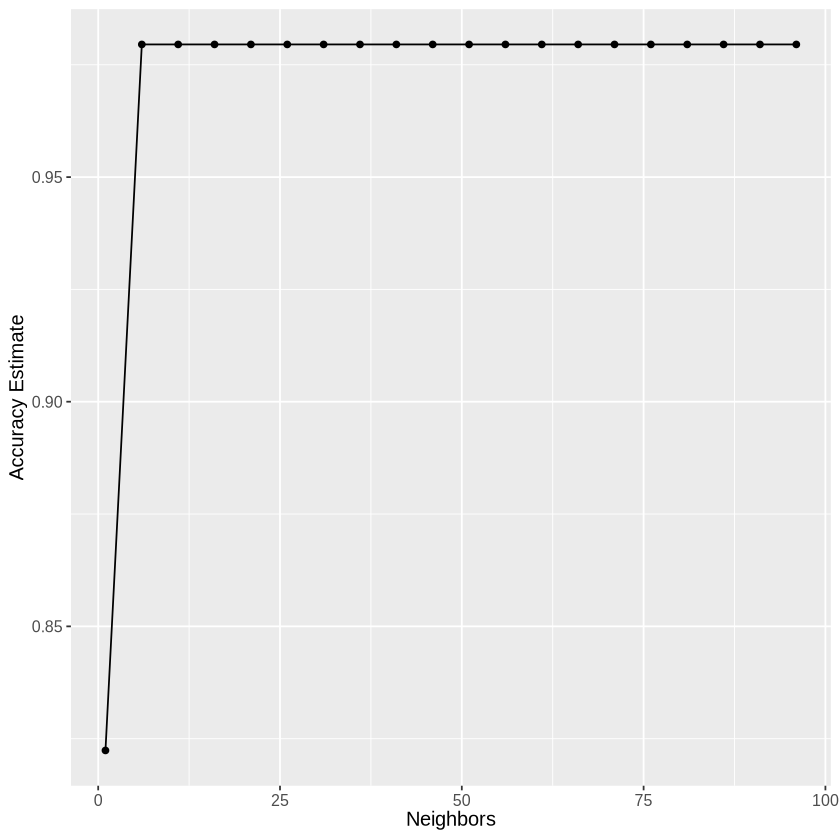

In [65]:
accuracy_vs_k <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate") +
  theme(text = element_text(size = 12))

accuracy_vs_k

In [66]:
best_k <- accuracies |>
        arrange(desc(mean)) |>
        head(1) |>
        pull(neighbors)
best_k

[1] 6

## 2.9 Predicting New Observed

In [67]:
set.seed(1)

Wdbc_recipe <- recipe(level ~ age + experience, data = players) |>                     
  step_center(all_predictors()) |>  
  step_scale(all_predictors())     

Wdbc_model <- nearest_neighbor(weight_func = "rectangular", neighbors = 3) |>
  set_engine("kknn") |>
  set_mode("classification")

Wdbc_workflow <- workflow() |>
  add_recipe(Wdbc_recipe) |>
  add_model(Wdbc_model)

Wdbc_fit <- Wdbc_workflow |>
  fit(data = players)

new_obs <- tibble(age = 18, experience = 4)  
predict(Wdbc_fit, new_obs)

.pred_class
<fct>
low


# Discussion